In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import pandas as pd
import numpy as np

import oshe as tc
idd_file = r"C:\openstudio-2.7.0\EnergyPlus\Energy+.idd"

In [2]:
import gnd_worker
from multiprocessing import Pool

In [3]:
keys = ["DrySand", "DryDust", "MoistSoil", "Mud", "Concrete", "Asphalt", "Rock", ]
if __name__ ==  '__main__': 
    num_processors = 7
    p=Pool(processes=num_processors)
    output = p.map(gnd_worker.gen_stuff, keys)


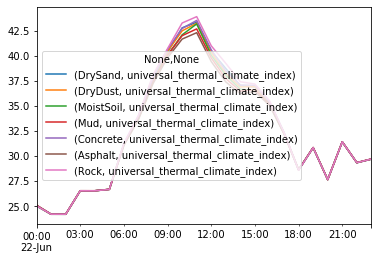

In [4]:
df = pd.concat([i.df_utci for i in output], axis=1, keys=keys)
df["2018-06-22"].plot()

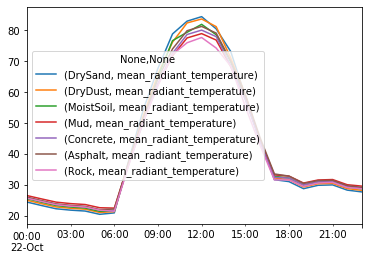

In [5]:
df = pd.concat([i.df_mrt for i in output], axis=1, keys=keys)
df["2018-10-22"].plot()

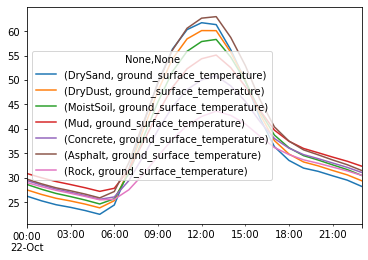

In [6]:
df = pd.concat([i.df_surface_temperature for i in output], axis=1, keys=keys)
df["2018-10-22"].plot()

In [ ]:
gnds = []
for g in [
    "DrySand", 
    "DryDust", 
    "MoistSoil", 
    "Mud", 
    "Concrete", 
    "Asphalt", 
    "Rock", 
]:
    gnds.append(tc.ground.Ground(ground_type=g))

def gen_stuff(key="DrySand"):
    temp = tc.ground.Ground(ground_type=key)
    temp.srf_temp(
        epw_file=r"C:\Users\tgerrish\Desktop\MEX_JAL_Puerto.Vallarta-Ordaz.Intl.AP.766013_TMYx.epw",
        idd_file=idd_file
    )
    return temp

pool = multiprocessing.Pool(processes=7)

result = pool.map(gen_stuff(), ["DrySand", "DryDust", "MoistSoil", "Mud", "Concrete", "Asphalt", "Rock", ]) 
# gen_stuff(key="Rock")

In [12]:
pool = multiprocessing.Pool(processes=7)

